In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [24]:
image = cv2.imread('flower.jpg')
noise_size = image.shape
mean = 0
noise_variance = 0.005 
sigma = np.sqrt(noise_variance)
image  = image / 255
noise_image = image + np.random.normal(loc = mean , scale = sigma , size=noise_size)
noise_image = np.clip(noise_image, 0, 255)
cv2.imshow('Input image with noise', noise_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
def SVD(color_channel,k):
    U, SG, Vt = np.linalg.svd(color_channel, full_matrices=False) 
    return U[:,:k] @ np.diag(SG[:k]) @ Vt[:k,:]

In [26]:
K_approximation = [10, 50, 100, 150 , 200]
compressed_images = []
B, G, R = cv2.split(noise_image)
compressed_images = []
for k in K_approximation:
        B_SVD = SVD(B, k)
        G_SVD = SVD(G, k)
        R_SVD = SVD(R, k)
        new_image = np.zeros_like(image)
        new_image = cv2.merge((R_SVD, G_SVD, B_SVD ))
        new_image[new_image < 0] = 0
        new_image[new_image > 255] = 255
        compressed_images.append(new_image)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


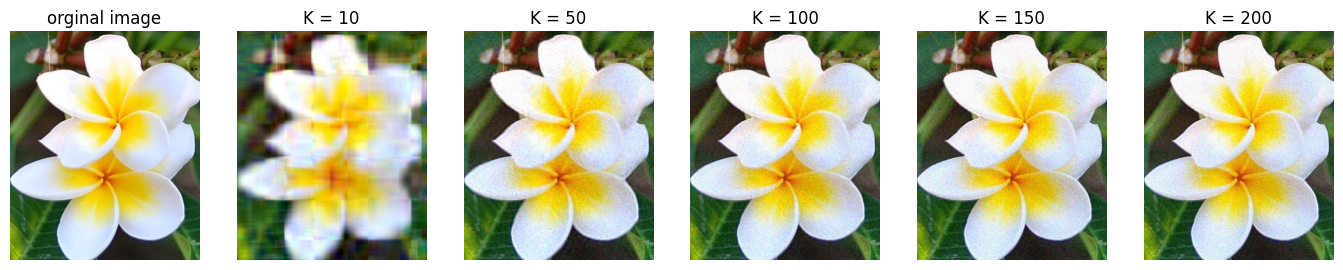

In [27]:
plt.figure(figsize=(20, 15))
plt.subplot(1, len(K_approximation) + 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread('flower.jpg') , cv2.COLOR_BGR2RGB) , cmap = plt.cm.Spectral)
plt.title("orginal image")
plt.axis('off')

for i, (K, compressed_image) in enumerate(zip(K_approximation, compressed_images), 3):
    plt.subplot(1, len(K_approximation) + 2, i-1)
    plt.imshow(compressed_image)
    plt.title(f'K = {K}')
    plt.axis('off')
plt.show()

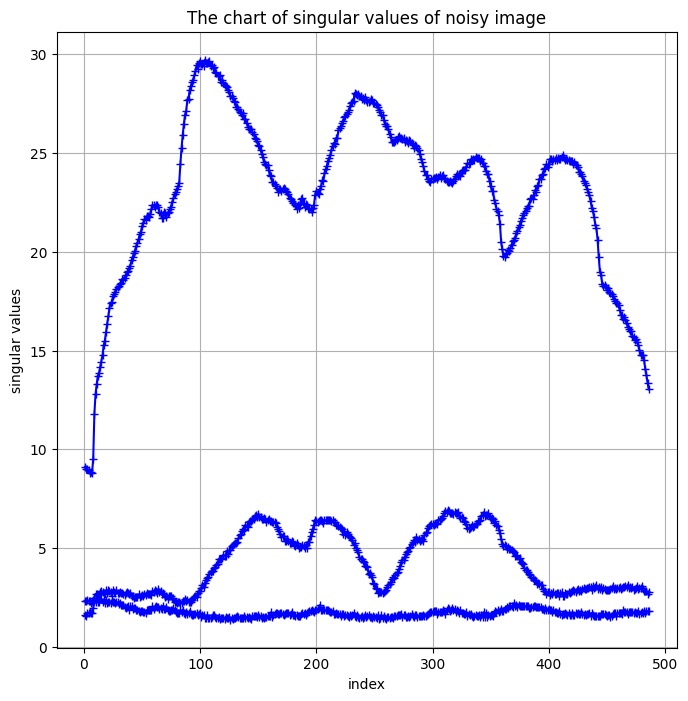

optimal value k: 25


In [28]:
U, SG, Vt = np.linalg.svd(noise_image, full_matrices=False)
plt.figure(figsize=(8, 8))
plt.plot(range(1, len(SG) + 1), SG, marker='+', linestyle='-', color='blue')
plt.xlabel("index")
plt.ylabel("singular values")
plt.title("The chart of singular values of noisy image")
plt.grid(True)
plt.show()

optimal_K = np.argmax(np.gradient(SG)) + 1
print(f'optimal value k: {optimal_K}')